## Model Comparison

In [1]:
import pybamm

In [2]:
# simulating and solving SPM and DFN
model_spm = pybamm.lithium_ion.SPM()
model_dfn = pybamm.lithium_ion.DFN()
sim_spm = pybamm.Simulation(model_spm)
sim_dfn = pybamm.Simulation(model_dfn)
sim_spm.solve([0,3600])
sim_dfn.solve([0,3600])

In [3]:
import matplotlib.pyplot as plt

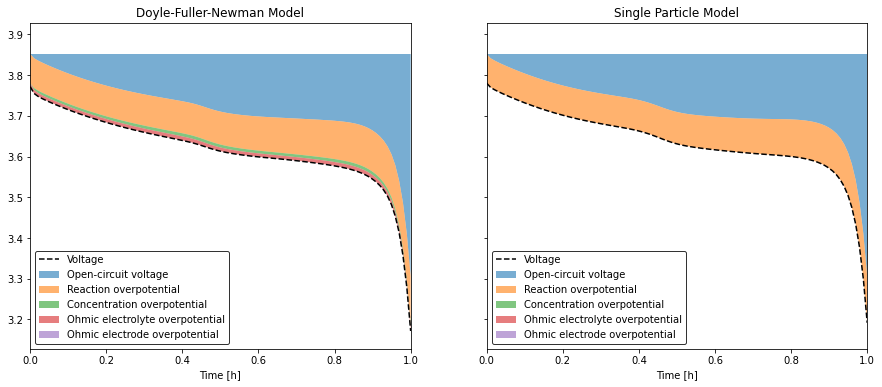

In [4]:
# comparing voltage components for Doyle-Fuller-Newman model and Single Particle Model
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
pybamm.plot_voltage_components(sim_dfn.solution, ax=axes.flat[0])
pybamm.plot_voltage_components(sim_spm.solution, ax=axes.flat[1])

axes.flat[0].set_title("Doyle-Fuller-Newman Model")
axes.flat[1].set_title("Single Particle Model")

plt.show()

## Setting Parameter Values

In [5]:
import os

In [6]:
os.chdir(pybamm.__path__[0]+'/..')

In [7]:
parameter_values = pybamm.ParameterValues("Chen2020")
parameter_values

{'1 + dlnf/dlnc': 1.0,
 'Ambient temperature [K]': 298.15,
 'Bulk solvent concentration [mol.m-3]': 2636.0,
 'Cation transference number': 0.2594,
 'Cell cooling surface area [m2]': 0.0053100000000000005,
 'Cell volume [m3]': 2.42e-05,
 'Current function [A]': 5.0,
 'EC diffusivity [m2.s-1]': 2e-18,
 'EC initial concentration in electrolyte [mol.m-3]': 4541.0,
 'Electrode height [m]': 0.065,
 'Electrode width [m]': 1.58,
 'Electrolyte conductivity [S.m-1]': <function electrolyte_conductivity_Nyman2008 at 0x00000158E1633790>,
 'Electrolyte diffusivity [m2.s-1]': <function electrolyte_diffusivity_Nyman2008 at 0x00000158DF566A60>,
 'Initial concentration in electrolyte [mol.m-3]': 1000.0,
 'Initial concentration in negative electrode [mol.m-3]': 29866.0,
 'Initial concentration in positive electrode [mol.m-3]': 17038.0,
 'Initial inner SEI thickness [m]': 2.5e-09,
 'Initial outer SEI thickness [m]': 2.5e-09,
 'Initial temperature [K]': 298.15,
 'Inner SEI electron conductivity [S.m-1]': 8

In [8]:
parameter_values.search("electrolyte")

EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Nyman2008 at 0x00000158E1633790>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Nyman2008 at 0x00000158DF566A60>
Initial concentration in electrolyte [mol.m-3]	1000.0
Negative electrode Bruggeman coefficient (electrolyte)	1.5
Positive electrode Bruggeman coefficient (electrolyte)	1.5
Separator Bruggeman coefficient (electrolyte)	1.5
Typical electrolyte concentration [mol.m-3]	1000.0


In [9]:
parameter_values.search("current")

Current function [A]	5.0
Negative current collector conductivity [S.m-1]	58411000.0
Negative current collector density [kg.m-3]	8960.0
Negative current collector specific heat capacity [J.kg-1.K-1]	385.0
Negative current collector thermal conductivity [W.m-1.K-1]	401.0
Negative current collector thickness [m]	1.2e-05
Negative electrode exchange-current density [A.m-2]	<function graphite_LGM50_electrolyte_exchange_current_density_Chen2020 at 0x00000158D9959EE0>
Positive current collector conductivity [S.m-1]	36914000.0
Positive current collector density [kg.m-3]	2700.0
Positive current collector specific heat capacity [J.kg-1.K-1]	897.0
Positive current collector thermal conductivity [W.m-1.K-1]	237.0
Positive current collector thickness [m]	1.6e-05
Positive electrode exchange-current density [A.m-2]	<function nmc_LGM50_electrolyte_exchange_current_density_Chen2020 at 0x00000158E1633160>
Ratio of inner and outer SEI exchange current densities	1.0
SEI reaction exchange current density [A

In [10]:
#To run a simulation with this parameter set, we can proceed as usual but passing the parameters as a keyword argument
spm_model = pybamm.lithium_ion.SPM()
spm_sim = pybamm.Simulation(spm_model,parameter_values = parameter_values)
spm_sim.solve([0,3600])
spm_sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3567.855165720961, step=35.67855165720961), …

In [20]:
chemistry = pybamm.parameter_sets.Chen2020

In [21]:
chemistry

{'chemistry': 'lithium_ion',
 'cell': 'LGM50_Chen2020',
 'negative electrode': 'graphite_Chen2020',
 'separator': 'separator_Chen2020',
 'positive electrode': 'nmc_Chen2020',
 'electrolyte': 'lipf6_Nyman2008',
 'experiment': '1C_discharge_from_full_Chen2020',
 'sei': 'example',
 'citation': 'Chen2020'}

In [22]:
chemistry["electrolyte"] = "lipf6_Valoen2005"

In [23]:
parameter_values = pybamm.ParameterValues(chemistry)

In [24]:
parameter_values.search("electrolyte")

EC initial concentration in electrolyte [mol.m-3]	4541.0
Electrolyte conductivity [S.m-1]	<function electrolyte_conductivity_Valoen2005 at 0x00000158E12E38B0>
Electrolyte diffusivity [m2.s-1]	<function electrolyte_diffusivity_Valoen2005 at 0x00000158D9982040>
Initial concentration in electrolyte [mol.m-3]	1000.0
Negative electrode Bruggeman coefficient (electrolyte)	1.5
Positive electrode Bruggeman coefficient (electrolyte)	1.5
Separator Bruggeman coefficient (electrolyte)	1.5
Typical electrolyte concentration [mol.m-3]	1000.0


In [25]:
model = pybamm.lithium_ion.DFN()
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=3560.1058147696576, step=35.60105814769658),…

In [26]:
model = pybamm.lithium_ion.DFN()
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Chen2020)

In [27]:
parameter_values["Current function [A]"] = 10

In [28]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve([0, 3600])
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1724.4256164479757, step=17.244256164479758)…

In [29]:
import pandas as pd    # needed to read the csv data file

# Import drive cycle from file
drive_cycle = pd.read_csv("pybamm/input/drive_cycles/US06.csv", comment="#", header=None).to_numpy()

# Create interpolant
timescale = parameter_values.evaluate(model.timescale)
current_interpolant = pybamm.Interpolant(drive_cycle[:, 0], drive_cycle[:, 1], timescale * pybamm.t)

# Set drive cycle
parameter_values["Current function [A]"] = current_interpolant

In [30]:
model = pybamm.lithium_ion.SPMe()
sim = pybamm.Simulation(model, parameter_values=parameter_values)
sim.solve()
sim.plot(["Current [A]", "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=97.69494262847446, step=0.9769494262847447),…

In [31]:
import numpy as np

def my_current(t):
    return pybamm.sin(2 * np.pi * t / 60)

parameter_values["Current function [A]"] = my_current

In [36]:
model = pybamm.lithium_ion.SPMe()
sim = pybamm.Simulation(model, parameter_values=parameter_values)
t_eval = np.arange(0, 121, 1)
sim.solve(t_eval=t_eval)
sim.plot(["Current [A]", "Terminal voltage [V]"])

interactive(children=(FloatSlider(value=0.0, description='t', max=35.87554879891207, step=0.3587554879891207),…